# Classification Breast Cancer Wisconsin with Binary Bat Algorithm Optimization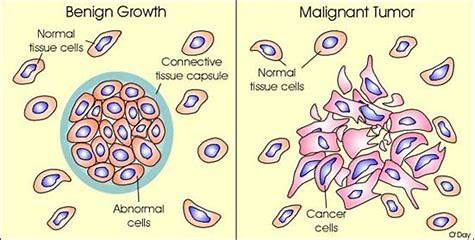

This project created by Audioseto Wiguno from Brawijaya University

# Introduction



Breast cancer is one of the frequently diagnosed types of cancer in women. It occurs due to the aberrant growth of cells that have lost their normal control mechanisms, leading to abnormal, rapid, and uncontrolled growth. Breast cancer is considered a leading cause of death worldwide, with an estimated 8.2 million deaths. This mortality rate can be reduced by enhancing awareness, prediction, and early diagnosis by medical professionals. Accurate prediction and diagnosis results can ensure that medical interventions are tailored to the patient's condition. Therefore, this project aims to develop a classification model for breast cancer patients using the Logistic Regression, Random Forest, and MLP Classifier methods, coupled with Binary Bat Algorithm for feature selection.

---
This project utilizes the Breast Cancer Wisconsin (Diagnostic) dataset obtained from Kaggle ([Datasets Breast Cancer Wisconsin](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)). The dataset comprises 568 patients with 32 attributes, where the target variable is 'diagnosis,' containing values of Malignant and Benign. Malignant tumors are cancerous growths characterized by uncontrolled cell growth and the ability to invade surrounding tissues or spread to other parts of the body. Benign tumors are non-cancerous growths characterized by localized and controlled cell growth.

---
In the previous research by V.Nanda Gopal et all (2021), the correlation function was employed to obtain the best features, resulting in the evaluation performance scores as follows:





| Evaluation | Random Forest | Logistic Regression | MLP Classifier |
| --------------- | --------------- | --------------- |--------------- |
| Precicion | 90%   | 78%   | 98%  |
| Recall  | 94%   | 79%    | 97%   |
| F1-Score   | 92%   | 78%   | 96%   |
| Accuracy    | 95%   | 79%   | 98%   |




---
In this project, I employ the Binary Bat Algorithm for feature selection to compare its evaluation with the results obtained in the previous research. This enables us to determine the superior feature selection method between the Binary Bat Algorithm and the Correlation Function.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT PACKAGE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import math
from sklearn.ensemble import RandomForestClassifier
import random
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORATORY DATA

**DATASET**

In [ ]:
file_path = "/content/drive/MyDrive/KSD/data.csv"
data = pd.read_csv(file_path)

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# Menghitung total nilai null
num_missing = data.isnull().sum().sum()
print("Number of rows with missing values:", num_missing)

Number of rows with missing values: 569


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

kolom diagnosis -> target



**ENCODING**

In [ ]:
df = data.drop(columns=['id','Unnamed: 32','diagnosis'])
Target = data['diagnosis']
data_target = data.drop(columns=['id','Unnamed: 32'])

In [ ]:
encoder = LabelEncoder()
Target = encoder.fit_transform(Target)
Target = pd.DataFrame(Target)
Target

,0
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [ ]:
name = ['diagnosis']

In [ ]:
Target = Target.rename(columns=dict(zip(Target.columns,name)))
Target

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In the "diagnosis" column, a value of 1 indicates patients diagnosed with malignancy, whereas a value of 0 indicates patients diagnosed with benign conditions.

In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**TRANSFORMATION DATA**

In [ ]:
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(df_scale, columns=df.columns)
df_scale.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# **DATA VISUALIZATION**

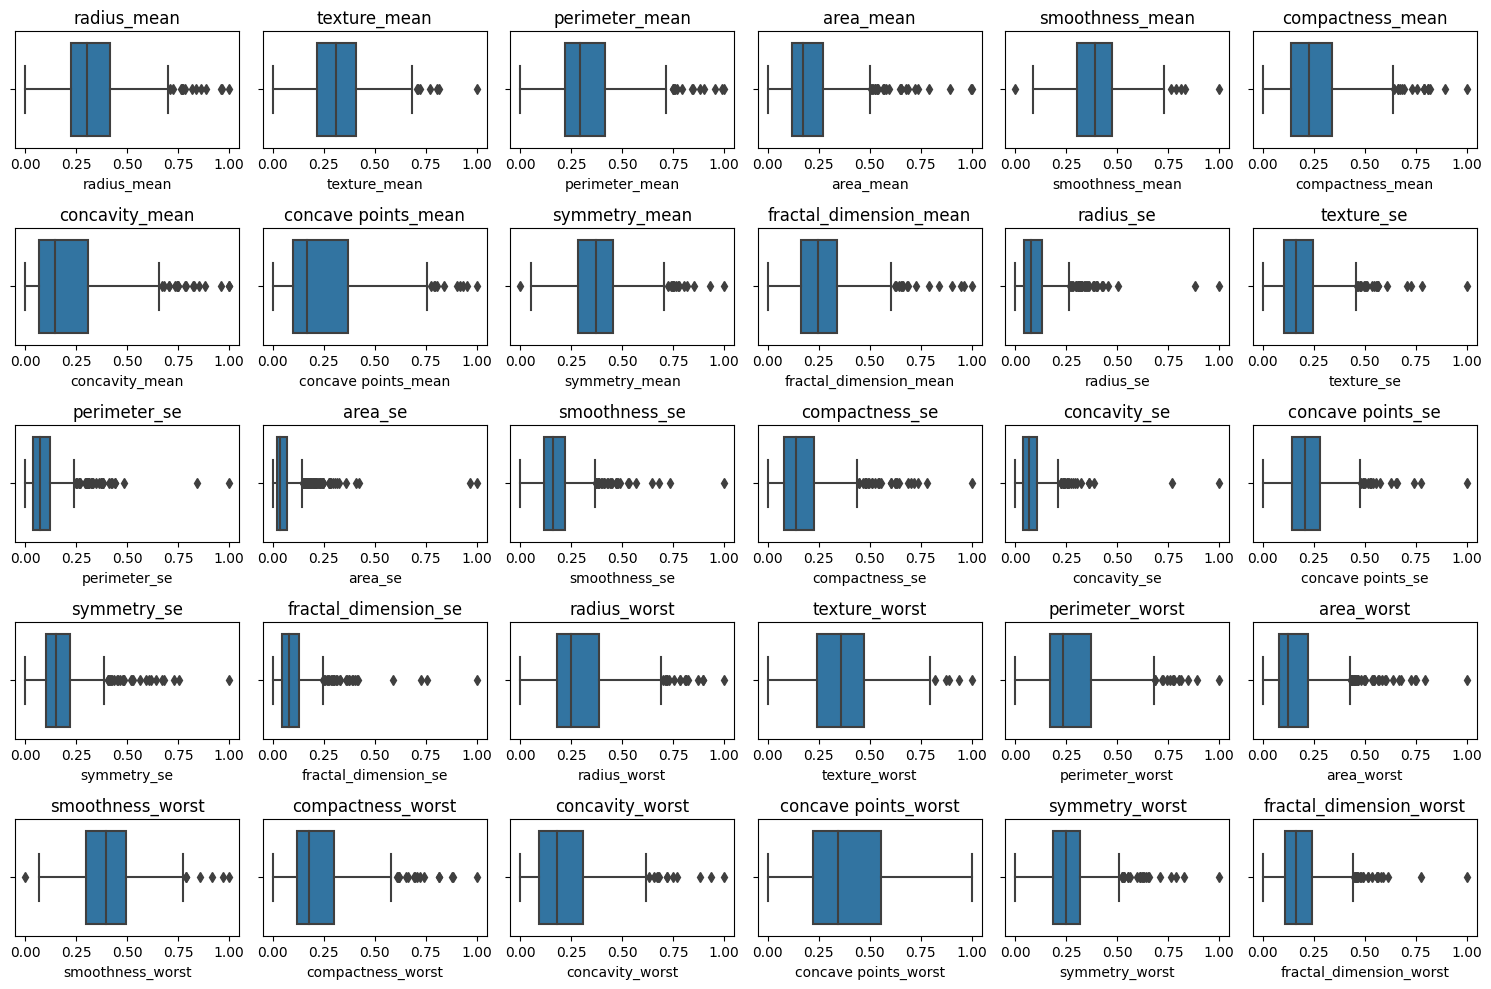

In [ ]:
#checking outlier
fig, axes = plt.subplots(5, 6, figsize=(15, 10))  # 5 rows, 6 columns

axes = axes.flatten()

for i, column in enumerate(df_scale.columns):
    sns.boxplot(x=df_scale[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


In [ ]:
for i, column in enumerate(df_scale.columns, start=1):

    q1 = df_scale[column].quantile(0.25)
    q3 = df_scale[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_percentage = ((df_scale[column] < lower_bound) | (df_scale[column] > upper_bound)).mean() * 100

# PRINT PERSENTASE
    print(f"{column}: {outliers_percentage:.2f}% outliers")


radius_mean: 2.46% outliers
texture_mean: 1.23% outliers
perimeter_mean: 2.28% outliers
area_mean: 4.39% outliers
smoothness_mean: 1.05% outliers
compactness_mean: 2.81% outliers
concavity_mean: 3.16% outliers
concave points_mean: 1.76% outliers
symmetry_mean: 2.64% outliers
fractal_dimension_mean: 2.64% outliers
radius_se: 6.68% outliers
texture_se: 3.51% outliers
perimeter_se: 6.68% outliers
area_se: 11.42% outliers
smoothness_se: 5.27% outliers
compactness_se: 4.92% outliers
concavity_se: 3.87% outliers
concave points_se: 3.34% outliers
symmetry_se: 4.75% outliers
fractal_dimension_se: 4.92% outliers
radius_worst: 2.99% outliers
texture_worst: 0.88% outliers
perimeter_worst: 2.64% outliers
area_worst: 6.15% outliers
smoothness_worst: 1.23% outliers
compactness_worst: 2.81% outliers
concavity_worst: 2.11% outliers
concave points_worst: 0.00% outliers
symmetry_worst: 4.04% outliers
fractal_dimension_worst: 4.22% outliers


**HANDLING OUTLIERS**

****

In [ ]:
from scipy.stats.mstats import winsorize

columns_with_outliers = df_scale.columns

#MENGATASI OUTLIER
for column in columns_with_outliers:
    df_scale[column] = winsorize(df_scale[column], limits=[0.05, 0.05])
    q1 = df_scale[column].quantile(0.25)
    q3 = df_scale[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_percentage = ((df_scale[column] < lower_bound) | (df_scale[column] > upper_bound)).mean() * 100
#PRINT PERSENTASE SETELAH DIATASI
    print(f"{column}: {outliers_percentage:.2f}% outliers setelah dihandle")


radius_mean: 0.00% outliers setelah dihandle
texture_mean: 0.00% outliers setelah dihandle
perimeter_mean: 0.00% outliers setelah dihandle
area_mean: 0.00% outliers setelah dihandle
smoothness_mean: 0.00% outliers setelah dihandle
compactness_mean: 0.00% outliers setelah dihandle
concavity_mean: 0.00% outliers setelah dihandle
concave points_mean: 0.00% outliers setelah dihandle
symmetry_mean: 0.00% outliers setelah dihandle
fractal_dimension_mean: 0.00% outliers setelah dihandle
radius_se: 6.68% outliers setelah dihandle
texture_se: 0.00% outliers setelah dihandle
perimeter_se: 6.68% outliers setelah dihandle
area_se: 11.42% outliers setelah dihandle
smoothness_se: 5.27% outliers setelah dihandle
compactness_se: 0.00% outliers setelah dihandle
concavity_se: 0.00% outliers setelah dihandle
concave points_se: 0.00% outliers setelah dihandle
symmetry_se: 0.00% outliers setelah dihandle
fractal_dimension_se: 0.00% outliers setelah dihandle
radius_worst: 0.00% outliers setelah dihandle
tex

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

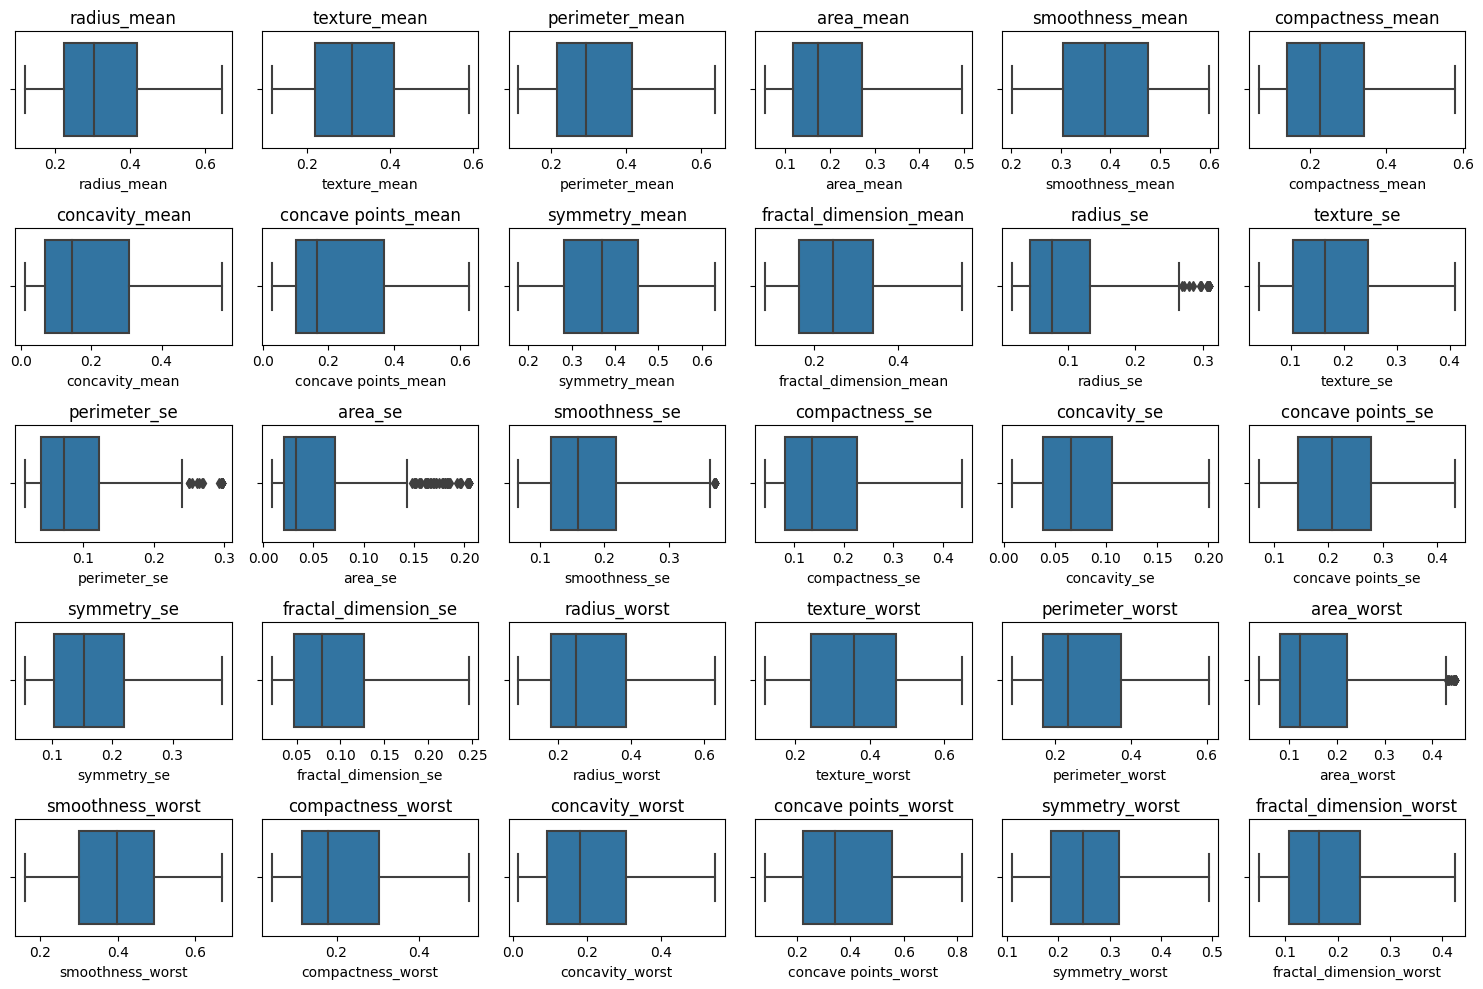

In [ ]:
#Outlier Checking with boxplot (SETELAH HANDLE)
fig, axes = plt.subplots(5, 6, figsize=(15, 10))  # 5 rows, 6 columns

axes = axes.flatten()

for i, column in enumerate(df_scale.columns):
    sns.boxplot(x=df_scale[column], ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

In [ ]:
data1 = pd.concat([df_scale, Target], axis=1)
data1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.521037,0.113967,0.545989,0.363733,0.593753,0.580701,0.571462,0.625746,0.631313,0.551179,...,0.141525,0.605558,0.448486,0.601136,0.521301,0.545767,0.817182,0.493002,0.418864,1
1,0.643144,0.272574,0.615783,0.495228,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.625746,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.817182,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.598267,0.580701,0.565604,0.522863,0.631313,0.551179,...,0.385928,0.241347,0.094008,0.668494,0.521301,0.545767,0.817182,0.493002,0.424767,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.643618,0.428813,0.636514,0.495228,0.526948,0.296055,0.571462,0.625746,0.336364,0.132056,...,0.383262,0.576174,0.448486,0.461137,0.178527,0.328035,0.761512,0.109600,0.105667,1
565,0.622320,0.589787,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.647655,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1
566,0.455251,0.589787,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1
567,0.643618,0.589787,0.636514,0.475716,0.588336,0.580701,0.571462,0.625746,0.631313,0.425442,...,0.647655,0.605558,0.402035,0.619626,0.521301,0.545767,0.817182,0.493002,0.424767,1


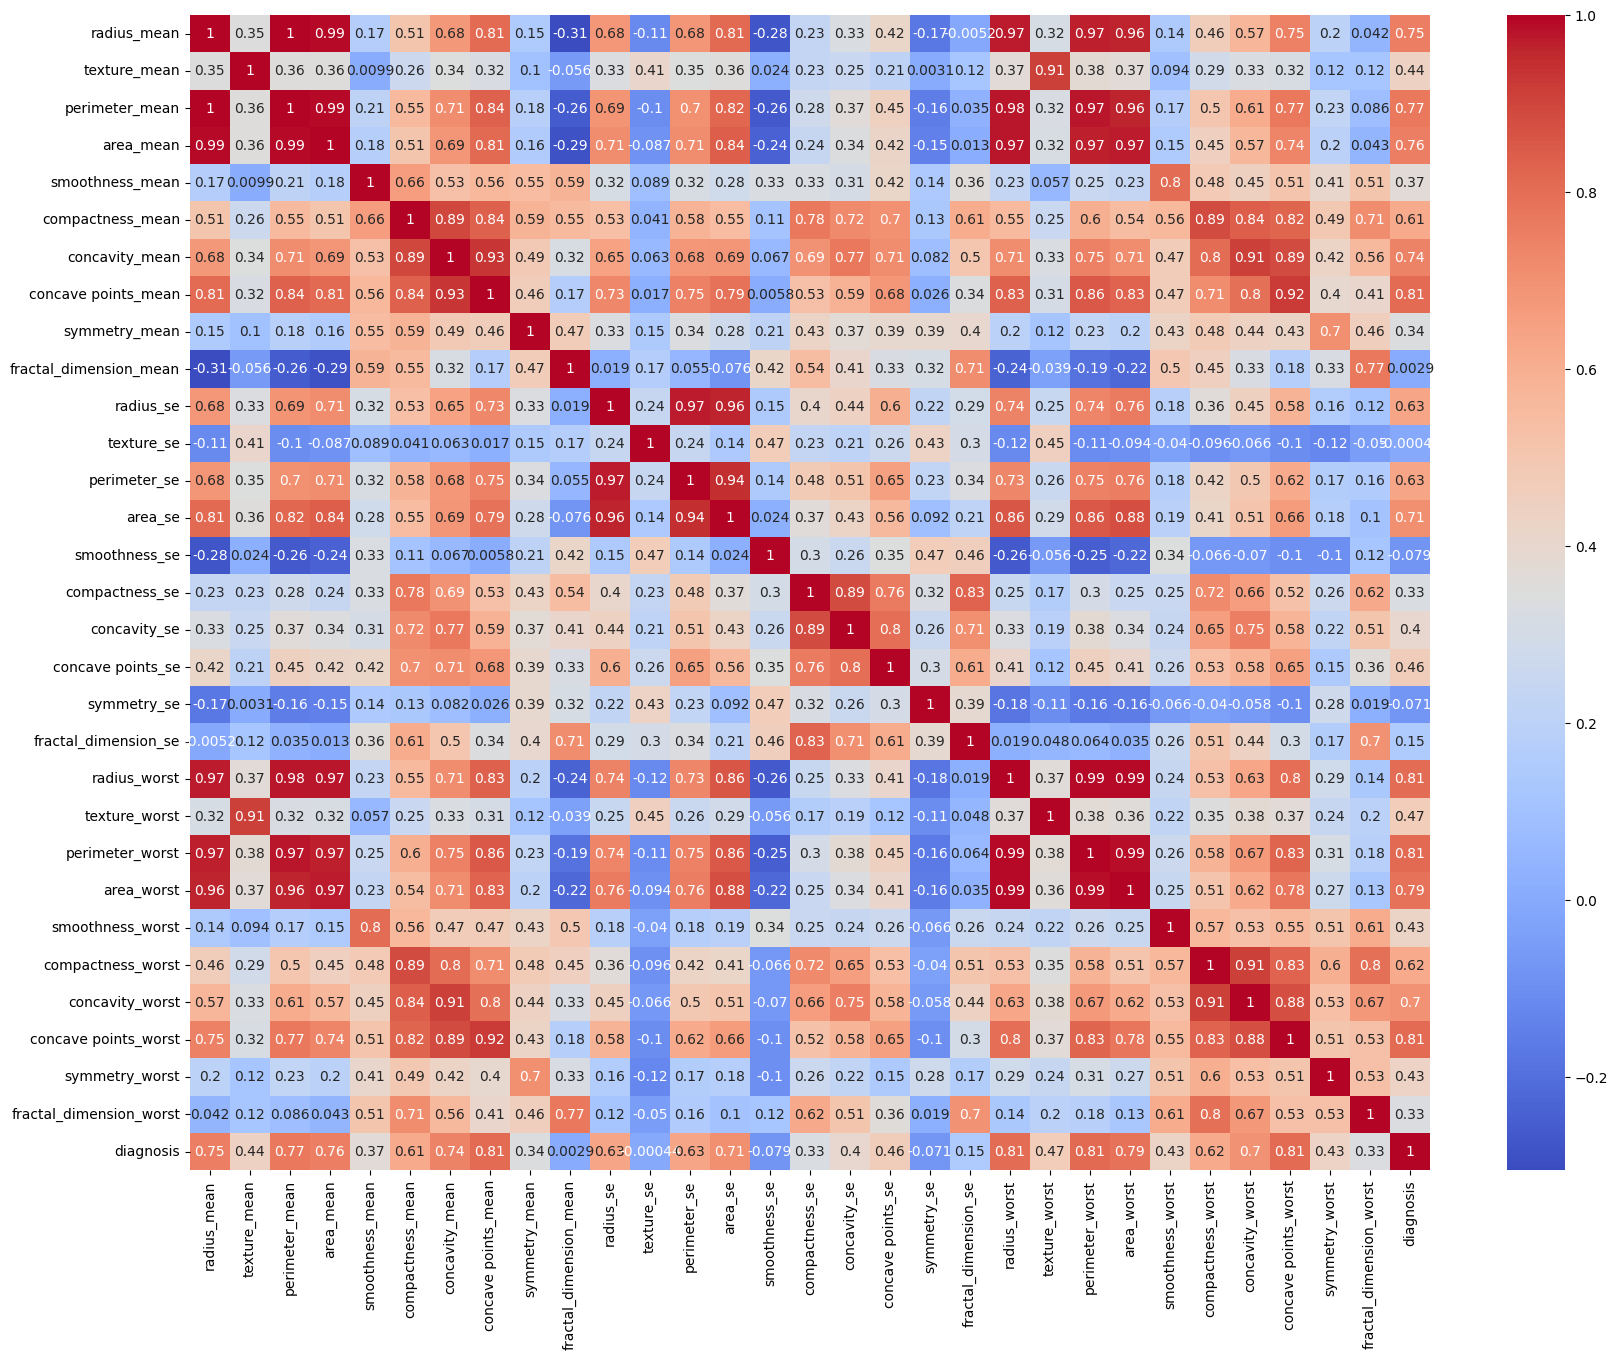

In [ ]:
#SNS MATRIKS KORELASI
plt.figure(figsize=(20, 15))
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

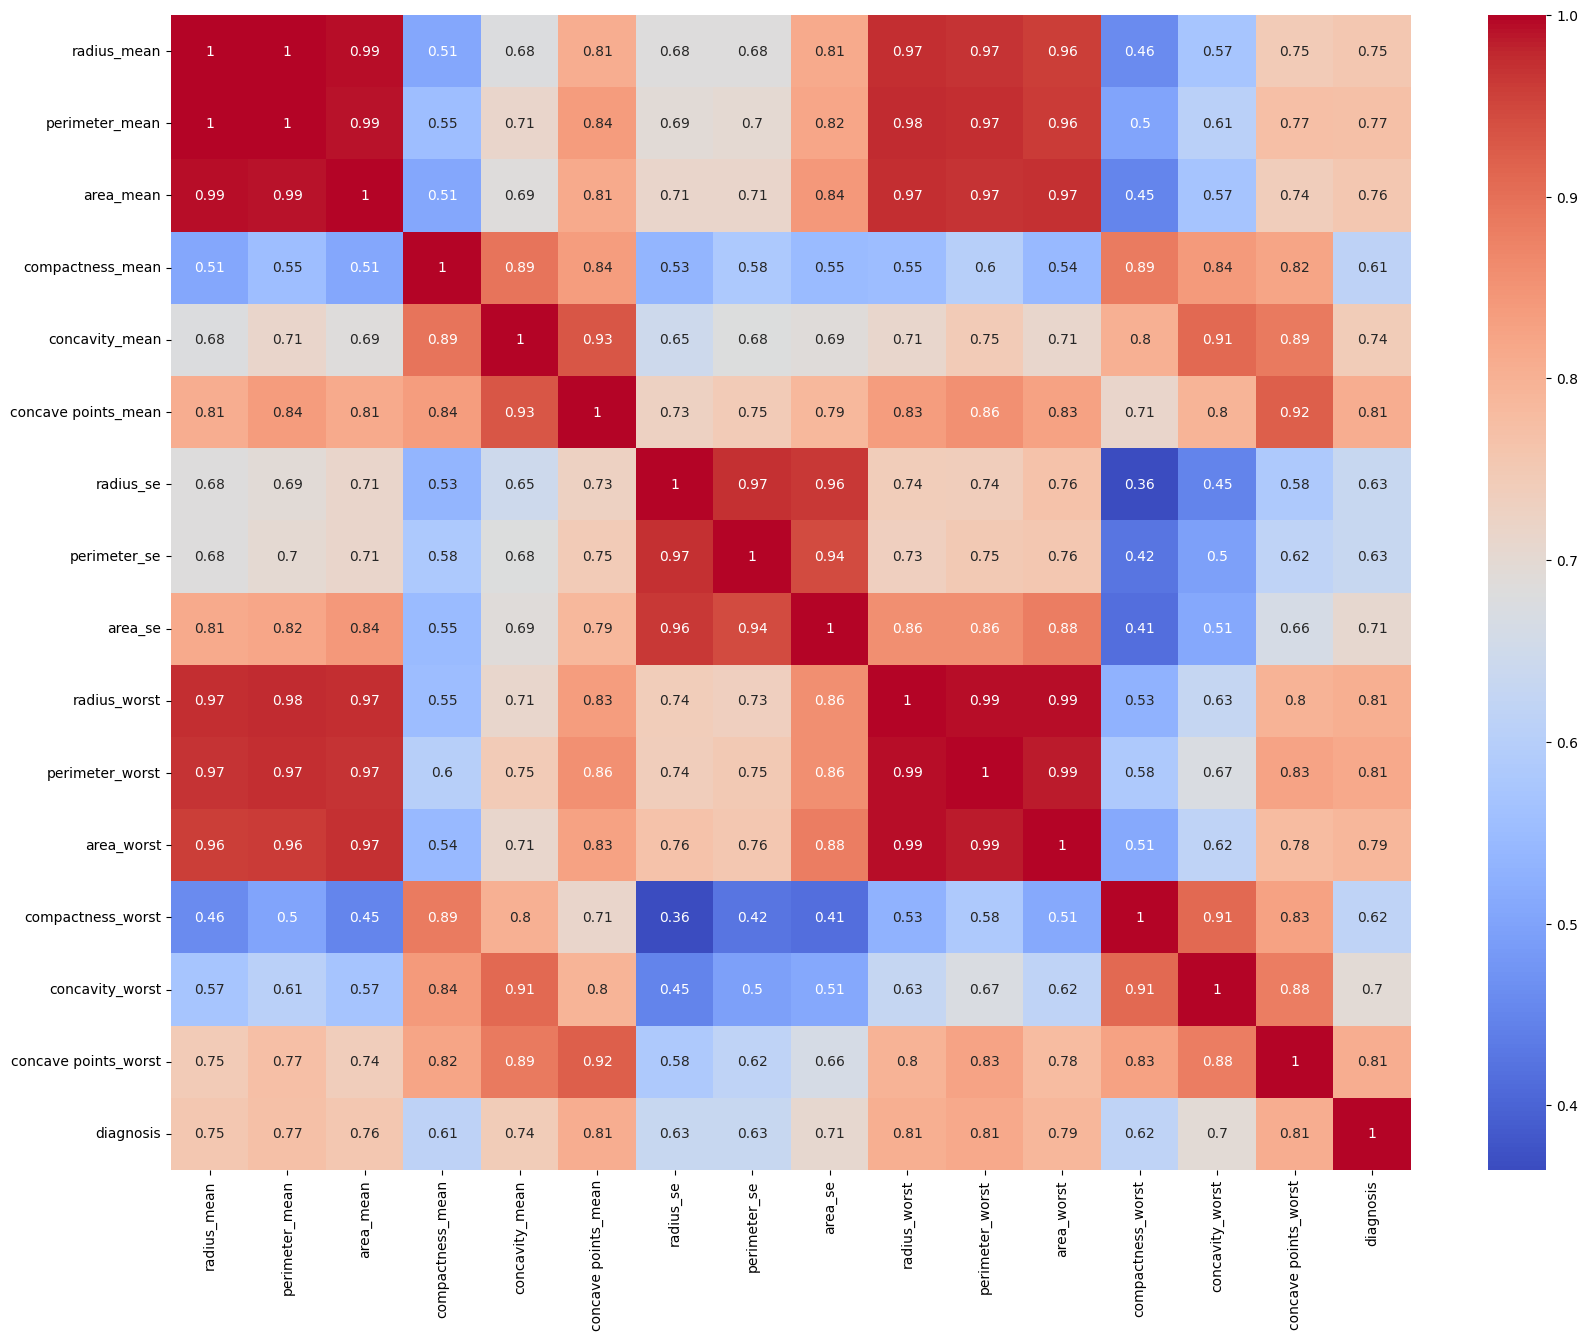

In [ ]:
#Menampilkan kolom dengan nilai korelasi > 0.5
plt.figure(figsize=(20, 15))
corr_matrix = data1.corr()
high_corr_columns = corr_matrix['diagnosis'][abs(corr_matrix['diagnosis']) > 0.5].index
sns.heatmap(data1[high_corr_columns].corr(), cmap='coolwarm', annot=True)
plt.show()

There are 15 columns with high correlation values, namely 'radius_mean,' 'perimeter_mean','area_mean','compactness_mean,' 'concavity_mean,' 'concave points_mean,' 'radius_se,' 'perimeter_se,' 'area_se,' 'radius_worst,' 'perimeter_worst,' 'area_worst,' 'compactness_worst,' 'concavity_worst,' and 'concave points_worst.'

# Binary Bat Algorithm Feature Selection

# BBA with Random Forest Classifier

In [ ]:
def BBA_RF(population_size, max_iterations, alpha, gamma, dataframe):
    min_frequency = 0
    max_frequency = 1

    features = dataframe.drop(columns=['diagnosis'])
    target = dataframe['diagnosis']

    # Split the data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

    dimension = len(features.columns)
    frequency = np.zeros(population_size)
    loudness = np.zeros(population_size)
    pulse_rate = np.zeros(population_size)

    velocity = np.zeros((population_size, dimension))
    solutions = np.zeros((population_size, dimension), dtype=int)

    test_accuracy = np.zeros(max_iterations)
    train_accuracy = np.zeros(max_iterations)
    val_accuracy = np.zeros(max_iterations)

    for i in range(population_size):
        loudness[i] = 1 + np.random.rand()
        pulse_rate[i] = np.random.rand()
        solutions[i] = np.random.randint(0, 2, dimension)
        if np.sum(solutions[i]) == 0 or np.sum(solutions[i]) == 1:
            random_indices = np.random.choice(dimension, 3, replace=False)
            for index in random_indices:
                solutions[i][index] = 1

    first_pulse_rate = pulse_rate.copy()

    global_fitness = 0
    fitness = np.zeros(population_size)

    for iteration in range(max_iterations):
        for i in range(population_size):
            selected_features = features.columns[solutions[i].astype(bool)]
            clf = RandomForestClassifier(n_estimators=2, max_depth=3)
            clf.fit(X_train[selected_features], y_train)
            y_pred = clf.predict(X_test[selected_features])
            new_fitness = accuracy_score(y_test, y_pred)

            if np.random.rand() < loudness[i] and new_fitness > fitness[i]:
                fitness[i] = new_fitness
                loudness[i] = alpha * loudness[i]
                pulse_rate[i] = first_pulse_rate[i] * (1 - np.exp(-gamma * iteration))

        best_index = np.argmax(fitness)
        max_fit = fitness[best_index]

        if max_fit > global_fitness:
            global_fitness = max_fit
            best_features = features.columns[solutions[best_index].astype(bool)]

        test_accuracy[iteration] = global_fitness

        clf.fit(X_train[best_features], y_train)
        y_train_pred = clf.predict(X_train[best_features])
        train_accuracy[iteration] = accuracy_score(y_train, y_train_pred)

        y_val_pred = clf.predict(X_val[best_features])
        val_accuracy[iteration] = accuracy_score(y_val, y_val_pred)

        for i in range(population_size):
            beta = np.random.rand()
            if np.random.rand() > pulse_rate[i]:
                for j in range(dimension):
                    solutions[i, j] = solutions[i, j] + ((np.random.rand() - 0.5) * 2) * statistics.mean(loudness)
                    sigma = np.random.choice([0, 1])
                    if sigma > 1 / (1 + np.exp(-solutions[i, j])):
                        solutions[i, j] = 1
                    else:
                        solutions[i, j] = 0

            if np.random.rand() < loudness[i] and fitness[i] < global_fitness:
                for j in range(dimension):
                    frequency[i] = min_frequency + (max_frequency - min_frequency) * beta
                    velocity[i, j] = velocity[i, j] + (solutions[best_index, j] - solutions[i, j]) * frequency[i]
                    solutions[i, j] = solutions[i, j] + velocity[i, j]
                    sigma = np.random.choice([0, 1])
                    if sigma > 1 / (1 + np.exp(-solutions[i, j])):
                        solutions[i, j] = 1
                    else:
                        solutions[i, j] = 0
        # Display Output
        print("Iteration:", iteration + 1)
        print("Selected Features:", best_features.tolist())
        print(f"Train Accuracy: {train_accuracy[iteration]}, Validation Accuracy: {val_accuracy[iteration]}, Test Accuracy: {global_fitness}\n")

    # Generate confusion matrix and classification report for the best solution
    clf.fit(X_train[best_features], y_train)
    y_pred_test = clf.predict(X_test[best_features])
    y_pred_train = clf.predict(X_train[best_features])
    con_matrix = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    return test_accuracy, train_accuracy, val_accuracy, con_matrix, report

In [ ]:
# Set parameter for binary bat algorithm
population_size = 10  # Number of individuals in the population
gamma = 0.4        # Loudness of the bats
alpha = 0.5      # Pulse rate of the bats
max_iterations = 24    # Maximum iterations


In [ ]:
# Call BBA function
test_accuracy, train_accuracy, val_accuracy, con_matrix, report = BBA_RF(population_size, max_iterations, alpha, gamma, data1)

Iteration: 1
Selected Features: ['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'symmetry_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'radius_worst', 'area_worst', 'concavity_worst']
Train Accuracy: 0.9422110552763819, Validation Accuracy: 0.9215686274509803, Test Accuracy: 0.9666666666666667

Iteration: 2
Selected Features: ['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'symmetry_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'radius_worst', 'area_worst', 'concavity_worst']
Train Accuracy: 0.9095477386934674, Validation Accuracy: 0.8627450980392157, Test Accuracy: 0.9666666666666667

Iteration: 3
Selected Features: ['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'symmetry_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'radius_worst', 'area_worst', 'concavity_worst']
Train Accuracy: 0.93718592

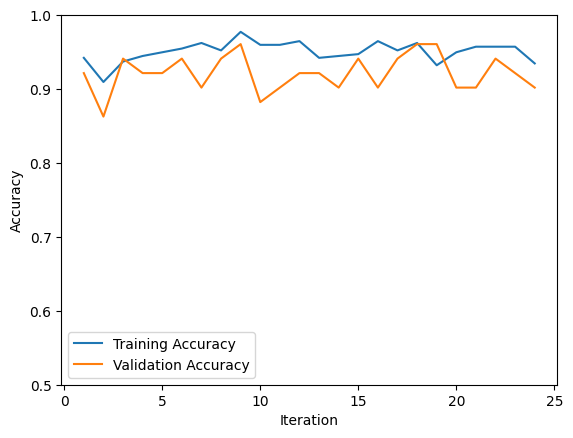

In [ ]:
# Plotting train, validation
plt.plot(range(1, max_iterations + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, max_iterations + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)  # Set y-axis limits
plt.legend()
plt.show()


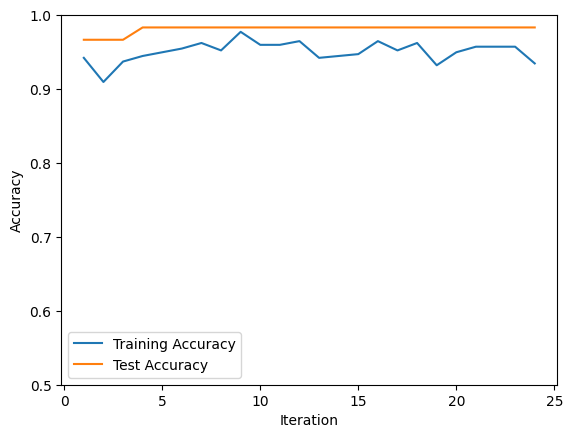

In [ ]:
    # Plotting train, test
    plt.plot(range(1, max_iterations + 1), train_accuracy, label='Training Accuracy')
    plt.plot(range(1, max_iterations + 1), test_accuracy, label='Test Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1)  # Set y-axis limits
    plt.legend()
    plt.show()

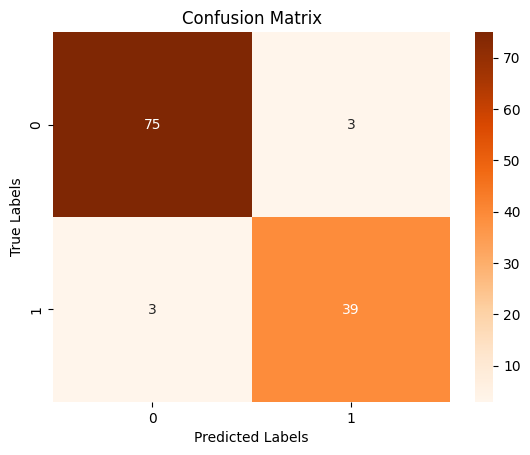

In [ ]:
# Visualize Confusion Matrix
sns.heatmap(con_matrix, annot=True, cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**CLASSIFICATION REPORT TEST**

In [ ]:
# Classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        78
           1       0.93      0.93      0.93        42

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



# Binary Bat Algorithm with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def BBA_LR(population_size, max_iterations, alpha, gamma, dataframe):
    min_frequency = 0
    max_frequency = 1

    features = dataframe.drop(columns=['diagnosis'])
    target = dataframe['diagnosis']

    # Split the data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

    dimension = len(features.columns)
    frequency = np.zeros(population_size)
    loudness = np.zeros(population_size)
    pulse_rate = np.zeros(population_size)

    velocity = np.zeros((population_size, dimension))
    solutions = np.zeros((population_size, dimension), dtype=int)

    test_accuracy = np.zeros(max_iterations)
    train_accuracy = np.zeros(max_iterations)
    val_accuracy = np.zeros(max_iterations)

    for i in range(population_size):
        loudness[i] = 1 + np.random.rand()
        pulse_rate[i] = np.random.rand()
        solutions[i] = np.random.randint(0, 2, dimension)
        if np.sum(solutions[i]) == 0 or np.sum(solutions[i]) == 1:
            random_indices = np.random.choice(dimension, 3, replace=False)
            for index in random_indices:
                solutions[i][index] = 1

    first_pulse_rate = pulse_rate.copy()

    global_fitness = 0
    fitness = np.zeros(population_size)

    for iteration in range(max_iterations):
        for i in range(population_size):
            selected_features = features.columns[solutions[i].astype(bool)]
            clf = LogisticRegression()  # Change to Logistic Regression
            clf.fit(X_train[selected_features], y_train)
            y_pred = clf.predict(X_test[selected_features])
            new_fitness = accuracy_score(y_test, y_pred)

            if np.random.rand() < loudness[i] and new_fitness > fitness[i]:
                fitness[i] = new_fitness
                loudness[i] = alpha * loudness[i]
                pulse_rate[i] = first_pulse_rate[i] * (1 - np.exp(-gamma * iteration))

        best_index = np.argmax(fitness)
        max_fit = fitness[best_index]

        if max_fit > global_fitness:
            global_fitness = max_fit
            best_features = features.columns[solutions[best_index].astype(bool)]

        test_accuracy[iteration] = global_fitness

        clf.fit(X_train[best_features], y_train)
        y_train_pred = clf.predict(X_train[best_features])
        train_accuracy[iteration] = accuracy_score(y_train, y_train_pred)

        y_val_pred = clf.predict(X_val[best_features])
        val_accuracy[iteration] = accuracy_score(y_val, y_val_pred)

        for i in range(population_size):
            beta = np.random.rand()
            if np.random.rand() > pulse_rate[i]:
                for j in range(dimension):
                    solutions[i, j] = solutions[i, j] + ((np.random.rand() - 0.5) * 2) * statistics.mean(loudness)
                    sigma = np.random.choice([0, 1])
                    if sigma > 1 / (1 + np.exp(-solutions[i, j])):
                        solutions[i, j] = 1
                    else:
                        solutions[i, j] = 0

            if np.random.rand() < loudness[i] and fitness[i] < global_fitness:
                for j in range(dimension):
                    frequency[i] = min_frequency + (max_frequency - min_frequency) * beta
                    velocity[i, j] = velocity[i, j] + (solutions[best_index, j] - solutions[i, j]) * frequency[i]
                    solutions[i, j] = solutions[i, j] + velocity[i, j]
                    sigma = np.random.choice([0, 1])
                    if sigma > 1 / (1 + np.exp(-solutions[i, j])):
                        solutions[i, j] = 1
                    else:
                        solutions[i, j] = 0
        # Display Output
        print("Iteration:", iteration + 1)
        print("Selected Features:", best_features.tolist())
        print(f"Train Accuracy: {train_accuracy[iteration]}, Validation Accuracy: {val_accuracy[iteration]}, Test Accuracy: {global_fitness}\n")

    # Generate confusion matrix and classification report for the best solution
    clf.fit(X_train[best_features], y_train)
    y_pred_test = clf.predict(X_test[best_features])
    y_pred_train = clf.predict(X_train[best_features])
    con_matrix = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    return test_accuracy, train_accuracy, val_accuracy, con_matrix, report

In [ ]:
# Set parameter for binary bat algorithm
population_size = 10  # Number of individuals in the population
gamma = 0.4        # Loudness of the bats
alpha = 0.5      # Pulse rate of the bats
max_iterations = 24    # Maximum iterations


In [ ]:
# Call BBA function
test_accuracy, train_accuracy, val_accuracy, con_matrix, report = BBA_LR(population_size, max_iterations, alpha, gamma, data1)

Iteration: 1
Selected Features: ['radius_mean', 'perimeter_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'fractal_dimension_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9522613065326633, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.975

Iteration: 2
Selected Features: ['radius_mean', 'perimeter_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'fractal_dimension_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9522613065326633, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.975

Iteration: 3
Selected Features: ['radius_mean', 'perimet

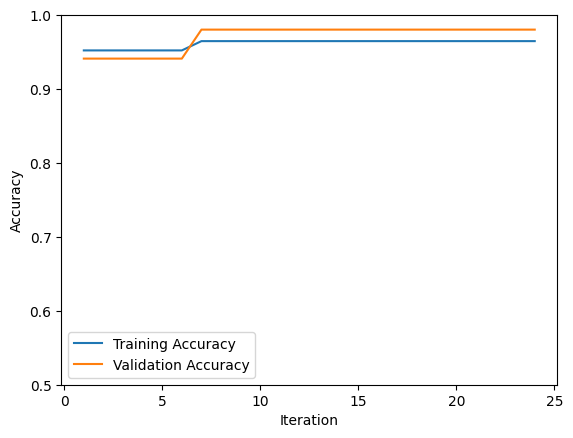

In [ ]:
# Plotting train, validation
plt.plot(range(1, max_iterations + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, max_iterations + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)  # Set y-axis limits
plt.legend()
plt.show()


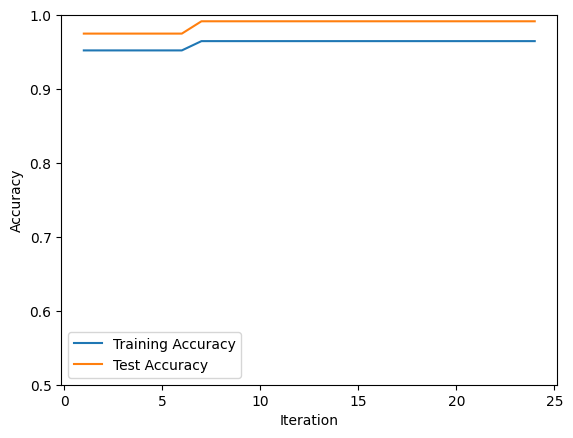

In [ ]:
    # Plotting train, test
    plt.plot(range(1, max_iterations + 1), train_accuracy, label='Training Accuracy')
    plt.plot(range(1, max_iterations + 1), test_accuracy, label='Test Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1)  # Set y-axis limits
    plt.legend()
    plt.show()

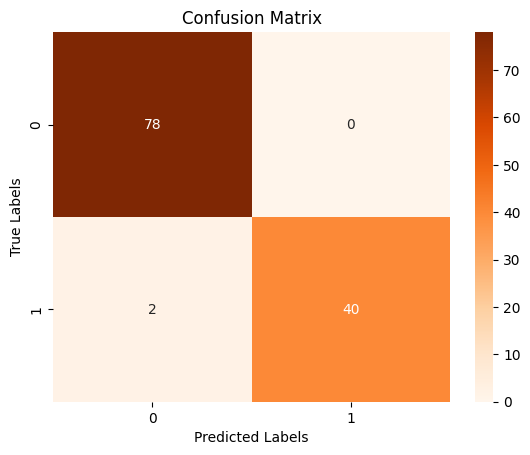

In [ ]:
# Visualize Confusion Matrix
sns.heatmap(con_matrix, annot=True, cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.95      0.98        42

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



# Binary Bat Algorithm with MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
def BBA_MLP(population_size, max_iterations, alpha, gamma, dataframe):
    min_frequency = 0
    max_frequency = 1

    features = dataframe.drop(columns=['diagnosis'])
    target = dataframe['diagnosis']

    # Split the data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

    dimension = len(features.columns)
    frequency = np.zeros(population_size)
    loudness = np.zeros(population_size)
    pulse_rate = np.zeros(population_size)

    velocity = np.zeros((population_size, dimension))
    solutions = np.zeros((population_size, dimension), dtype=int)

    test_accuracy = np.zeros(max_iterations)
    train_accuracy = np.zeros(max_iterations)
    val_accuracy = np.zeros(max_iterations)

    for i in range(population_size):
        loudness[i] = 1 + np.random.rand()
        pulse_rate[i] = np.random.rand()
        solutions[i] = np.random.randint(0, 2, dimension)
        if np.sum(solutions[i]) == 0 or np.sum(solutions[i]) == 1:
            random_indices = np.random.choice(dimension, 3, replace=False)
            for index in random_indices:
                solutions[i][index] = 1

    first_pulse_rate = pulse_rate.copy()

    global_fitness = 0
    fitness = np.zeros(population_size)

    for iteration in range(max_iterations):
        for i in range(population_size):
            selected_features = features.columns[solutions[i].astype(bool)]
            clf = MLPClassifier(activation='relu', alpha=0.0001, solver='adam')
            clf.fit(X_train[selected_features], y_train)
            y_pred = clf.predict(X_test[selected_features])
            new_fitness = accuracy_score(y_test, y_pred)

            if np.random.rand() < loudness[i] and new_fitness > fitness[i]:
                fitness[i] = new_fitness
                loudness[i] = alpha * loudness[i]
                pulse_rate[i] = first_pulse_rate[i] * (1 - np.exp(-gamma * iteration))

        best_index = np.argmax(fitness)
        max_fit = fitness[best_index]

        if max_fit > global_fitness:
            global_fitness = max_fit
            best_features = features.columns[solutions[best_index].astype(bool)]

        test_accuracy[iteration] = global_fitness

        clf.fit(X_train[best_features], y_train)
        y_train_pred = clf.predict(X_train[best_features])
        train_accuracy[iteration] = accuracy_score(y_train, y_train_pred)

        y_val_pred = clf.predict(X_val[best_features])
        val_accuracy[iteration] = accuracy_score(y_val, y_val_pred)

        for i in range(population_size):
            beta = np.random.rand()
            if np.random.rand() > pulse_rate[i]:
                for j in range(dimension):
                    solutions[i, j] = solutions[i, j] + ((np.random.rand() - 0.5) * 2) * statistics.mean(loudness)
                    sigma = np.random.choice([0, 1])
                    if sigma > 1 / (1 + np.exp(-solutions[i, j])):
                        solutions[i, j] = 1
                    else:
                        solutions[i, j] = 0

            if np.random.rand() < loudness[i] and fitness[i] < global_fitness:
                for j in range(dimension):
                    frequency[i] = min_frequency + (max_frequency - min_frequency) * beta
                    velocity[i, j] = velocity[i, j] + (solutions[best_index, j] - solutions[i, j]) * frequency[i]
                    solutions[i, j] = solutions[i, j] + velocity[i, j]
                    sigma = np.random.choice([0, 1])
                    if sigma > 1 / (1 + np.exp(-solutions[i, j])):
                        solutions[i, j] = 1
                    else:
                        solutions[i, j] = 0
        # Display Output
        print("Iteration:", iteration + 1)
        print("Selected Features:", best_features.tolist())
        print(f"Train Accuracy: {train_accuracy[iteration]}, Validation Accuracy: {val_accuracy[iteration]}, Test Accuracy: {global_fitness}\n")

    # Generate confusion matrix and classification report for the best solution
    clf.fit(X_train[best_features], y_train)
    y_pred_test = clf.predict(X_test[best_features])
    y_pred_train = clf.predict(X_train[best_features])
    con_matrix = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    return test_accuracy, train_accuracy, val_accuracy, con_matrix, report

In [ ]:
# Set parameter for binary bat algorithm
population_size = 10  # Number of individuals in the population
gamma = 0.4        # Loudness of the bats
alpha = 0.5      # Pulse rate of the bats
max_iterations = 24    # Maximum iterations


In [ ]:
# Call BBA function
test_accuracy, train_accuracy, val_accuracy, con_matrix, report = BBA_MLP(population_size, max_iterations, alpha, gamma, data1)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 1
Selected Features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9623115577889447, Validation Accuracy: 0.9803921568627451, Test Accuracy: 0.9833333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 2
Selected Features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'fractal_dimension_worst']
Train Accuracy: 0.957286432160804, Validation Accuracy: 0.9803921568627451, Test Accuracy: 0.9833333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 3
Selected Features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9597989949748744, Validation Accuracy: 0.9803921568627451, Test Accuracy: 0.9833333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 4
Selected Features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9623115577889447, Validation Accuracy: 0.9803921568627451, Test Accuracy: 0.9833333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 5
Selected Features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9597989949748744, Validation Accuracy: 0.9803921568627451, Test Accuracy: 0.9833333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 6
Selected Features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9623115577889447, Validation Accuracy: 0.9803921568627451, Test Accuracy: 0.9833333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 7
Selected Features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'fractal_dimension_worst']
Train Accuracy: 0.9597989949748744, Validation Accuracy: 0.9803921568627451, Test Accuracy: 0.9833333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 8
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 9
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 10
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9773869346733668, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 11
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 12
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9773869346733668, Validation Accuracy: 0.9607843137254902, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 13
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 14
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9607843137254902, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 15
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 16
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9773869346733668, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 17
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9607843137254902, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 18
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9798994974874372, Validation Accuracy: 0.9607843137254902, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 19
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 20
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 21
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9773869346733668, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 22
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 23
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9773869346733668, Validation Accuracy: 0.9607843137254902, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Iteration: 24
Selected Features: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
Train Accuracy: 0.9748743718592965, Validation Accuracy: 0.9411764705882353, Test Accuracy: 0.9916666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


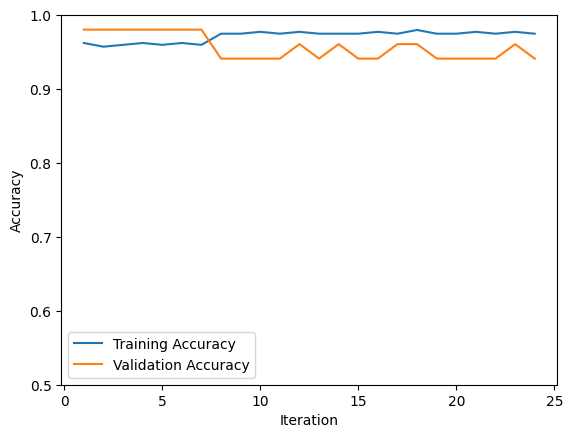

In [ ]:
# Plotting train, validation
plt.plot(range(1, max_iterations + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, max_iterations + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend()
plt.show()


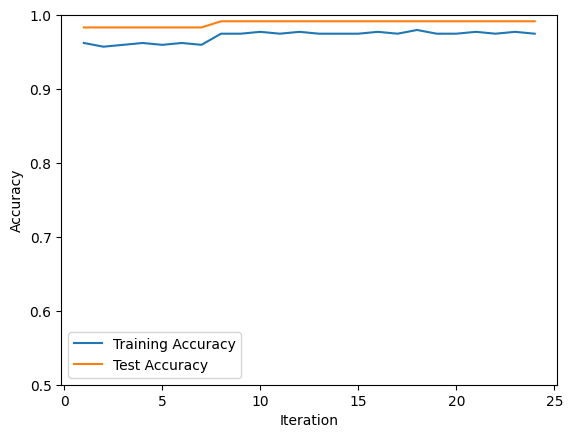

In [ ]:
# Plotting train, test
plt.plot(range(1, max_iterations + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, max_iterations + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend()
plt.show()

In [ ]:
# Classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.95      0.98        42

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



# Conclusion


From the three classifications using Binary Bat Algorithm optimization, 19 best features were obtained with the highest accuracy rate in the MLP Classifier model, achieving a training accuracy of 97.7% and a test accuracy of 99.1%. The selected best features are as follows: ['radius_mean', 'perimeter_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst'].

---

Evaluation table in the study by V. Nanda Gopal et al. (2021) using correlation function.

| Evaluation | Random Forest | Logistic Regression | MLP Classifier |
| --------------- | --------------- | --------------- |--------------- |
| Precicion | 90%   | 78%   | 98%  |
| Recall  | 94%   | 79%    | 97%   |
| F1-Score   | 92%   | 78%   | 96%   |
| Accuracy    | 95%   | 79%   | 98%   |


---
Evaluation table using Binary Bat Algorithm Optimization.

| Evaluation | Random Forest | Logistic Regression | MLP Classifier |
| --------------- | --------------- | --------------- |--------------- |
| Precicion | 95%   | 98%   | 98%  |
| Recall  | 95%   | 98%    | 98%   |
| F1-Score   | 95%   | 98%   | 98%   |
| Accuracy    | 95%   | 98%   | 98%   |



In the three classification methods used, there was an improvement in the performance evaluation metrics. In the logistic regression model, there was a significant increase in performance metrics by approximately 20% for each evaluation metric. Similarly, in the Random Forest and MLP methods, there was an improvement in evaluation metrics (Precision, Recall, F1-score, and accuracy).

---
Thus, the best classification method used to classify classes in the Wisconsin Breast Cancer dataset is the MLP Classifier, and feature selection using Binary Bat Algorithm is better than to correlation function.

